Task 1

In [8]:
import pandas as pd #manipulating datasets
import numpy as np #numerical calculations
from scipy.stats import norm #normalisation of data
from scipy import stats #to find statistical data
import seaborn as sns
import matplotlib.pyplot as plt #visual representation of data

In [2]:
#Load the dataset ‘pumpkin seeds’ 

In [14]:
df = pd.read_csv('/Users/vidhyabharath/Documents/Assignment-3/Pumpkin_Seeds_Dataset.csv')
df.shape
X= df.iloc[:,:-1] # include all rows and columns except last
y= df.iloc[:,-1].values #include all values in last column only
df.head(5)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik


In [15]:
#apply following analysis/feature engineering techniques on it:

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


In [17]:
#Observation: None of the columns have a null value. Hence we do not need 
#to deal with the missing values

In [18]:
#a. Check numerical columns for outliers

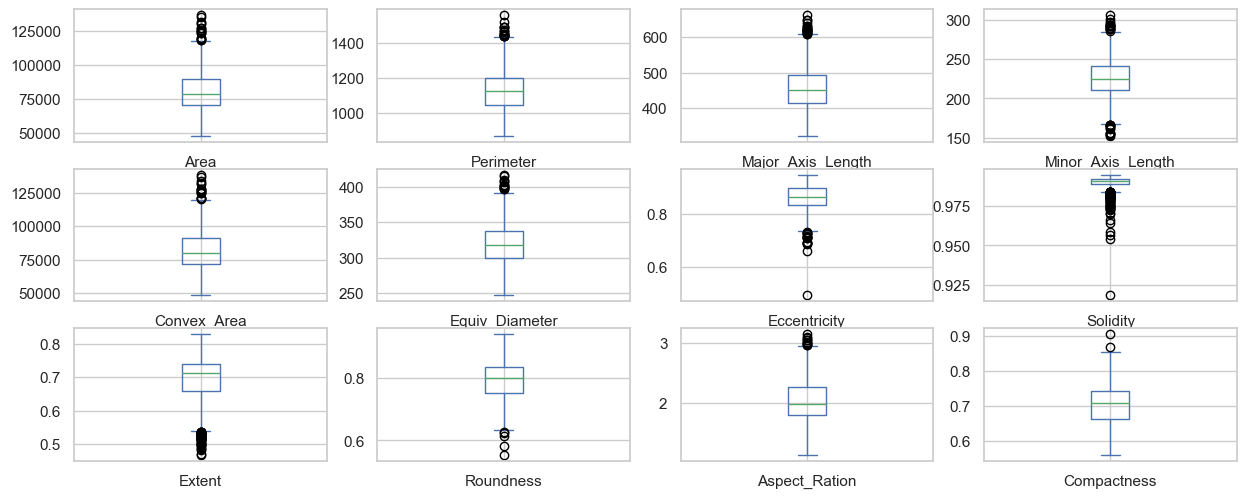

In [19]:
sns.set(style='whitegrid',rc={'figure.figsize':(15,10)})
# Set the number of subplots in each row
num_cols = 3
df.plot(kind='box',subplots=True,layout=(5,4),sharex=False)
plt.show()

In [20]:
# a. Remove the outliers using IQR method
# Identify numerical columns where you want to detect and remove outliers
numerical_columns = df.select_dtypes(include=['float64']).columns

# Loop through each numerical column and remove outliers using IQR method
for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the upper and lower bounds to identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove outliers
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


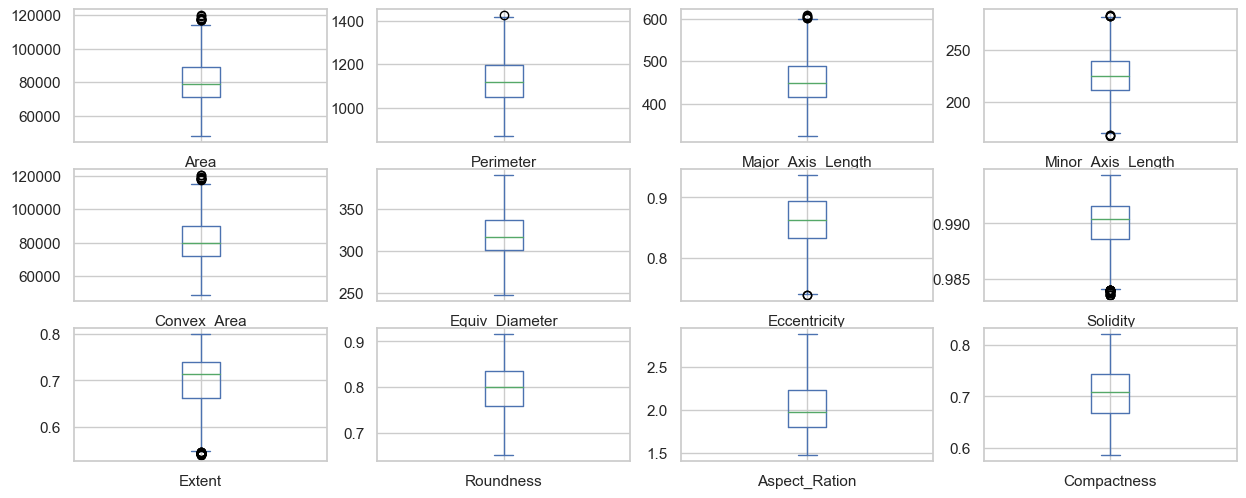

In [21]:
#Box plot after removing outliers
sns.set(style='whitegrid',rc={'figure.figsize':(15,10)})
# Set the number of subplots in each row
num_cols = 3
df.plot(kind='box',subplots=True,layout=(5,4),sharex=False)
plt.show()

In [22]:
#b. Normalize the numerical columns in the dataset

In [23]:
#check the percentage representation of the classes
df.Class.value_counts(normalize=True).round(3)

Class
Çerçevelik       0.531
Ürgüp Sivrisi    0.469
Name: proportion, dtype: float64

In [24]:
#c. Plot frequency distribution of the class variable (“Class” in the CSV file) using
#countplot() function from Seaborn library

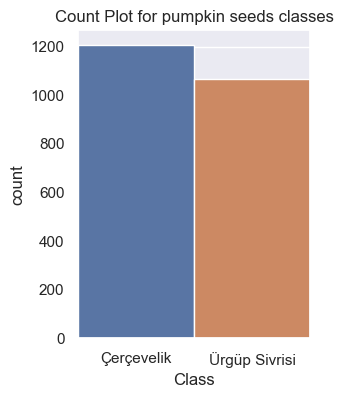

In [25]:
sns.set(rc={'figure.figsize':(3,4)})
sns.countplot(data=df, x='Class',width=1,label=True)
plt.title('Count Plot for pumpkin seeds classes')
plt.show()

Task 2

In [26]:
#Split the dataset into training and testing sets using train_test_split from sklearn.model_selection

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

Task 3

In [28]:
#Use KNeighborsClassifier from sklearn.neighbors to train a classification model with k=3
#and predict on the training data. Print the classification report for training data

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import datasets

#Create and train the KNeighborsClassifier with k=3
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)

# Predict on the training data
y_train_pred = knn_classifier.predict(X_train)

# Print the classification report
print("Classification Report for Training Data:")
print(classification_report(y_train, y_train_pred))

Classification Report for Training Data:
               precision    recall  f1-score   support

   Çerçevelik       0.83      0.89      0.86      1058
Ürgüp Sivrisi       0.87      0.80      0.83       942

     accuracy                           0.85      2000
    macro avg       0.85      0.85      0.85      2000
 weighted avg       0.85      0.85      0.85      2000



Task 4

In [30]:
#Use model trained above to predict on test set and print the classification report for test predictions

In [31]:
# Predict on the test data
y_test_pred = knn_classifier.predict(X_test)

# Print the classification report for test predictions
print("Classification Report for Test Data:")
print(classification_report(y_test, y_test_pred))

Classification Report for Test Data:
               precision    recall  f1-score   support

   Çerçevelik       0.64      0.73      0.68       242
Ürgüp Sivrisi       0.70      0.61      0.65       258

     accuracy                           0.67       500
    macro avg       0.67      0.67      0.67       500
 weighted avg       0.67      0.67      0.67       500



Task 5

In [32]:
#Implement a loop to try different values of 'K' (number of neighbors). Train with following k values [5,7,9,11]

In [33]:
# Values of 'K' to try
k_values = [5, 7, 9, 11]

# Loop through different values of 'K'
for k in k_values:
    # Create KNeighborsClassifier with current 'K' value
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model on the training data
    knn_classifier.fit(X_train, y_train)
    
    # Predict on the test data
    y_test_pred = knn_classifier.predict(X_test)
    
    # Print the classification report for test predictions
    print(f"Classification Report for Test Data with K={k}:")
    print(classification_report(y_test, y_test_pred))
    print("**********************************************************")


Classification Report for Test Data with K=5:
               precision    recall  f1-score   support

   Çerçevelik       0.62      0.72      0.67       242
Ürgüp Sivrisi       0.69      0.59      0.63       258

     accuracy                           0.65       500
    macro avg       0.65      0.65      0.65       500
 weighted avg       0.66      0.65      0.65       500

**********************************************************
Classification Report for Test Data with K=7:
               precision    recall  f1-score   support

   Çerçevelik       0.61      0.70      0.65       242
Ürgüp Sivrisi       0.67      0.58      0.62       258

     accuracy                           0.64       500
    macro avg       0.64      0.64      0.64       500
 weighted avg       0.64      0.64      0.64       500

**********************************************************
Classification Report for Test Data with K=9:
               precision    recall  f1-score   support

   Çerçevelik       0.

Task 6

In [34]:
# Plot the classification accuracy obtained on test dataset on y-axis for k=3,5,7,9,11 with k on x-axis

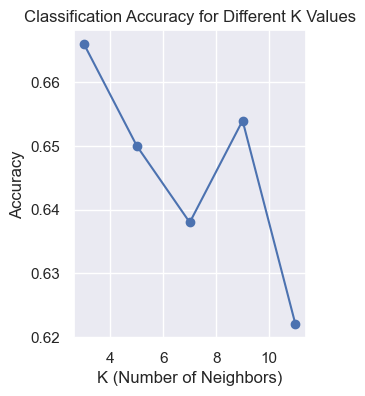

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Values of 'K' 
k_values = [3, 5, 7, 9, 11]

# Initialize an empty list to store accuracy scores
accuracy_scores = []

# Loop through different values of 'K'
for k in k_values:
    # Create KNeighborsClassifier with current 'K' value
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model on the training data
    knn_classifier.fit(X_train, y_train)
    
    # Predict on the test data
    y_test_pred = knn_classifier.predict(X_test)
    
    # Calculate accuracy and append to the list
    accuracy = accuracy_score(y_test, y_test_pred)
    accuracy_scores.append(accuracy)

# Plotting the results
plt.plot(k_values, accuracy_scores, marker='o')
plt.title('Classification Accuracy for Different K Values')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.show()
